In [1]:
import sys
sys.path.append("../Python")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PyQt5
import math
from MyDescribe import MyDescribe
from MyHistogram import MyHistogram


In [2]:
# Read dataset
gaugeColumnList = {}
gaugeColumnList["Mean"] = ["Mean Radius","Mean Texture","Mean Perimeter","Mean Area","Mean Smoothness","Mean Compactness","Mean Concavity","Mean Concave points","Mean Symmetry","Mean Fractal dimension"]
gaugeColumnList["SE"] = ["Radius SE","Texture SE","Perimeter SE","Area SE","Smoothness SE","Compactness SE","Concavity SE","Concave points SE","Symmetry SE","Fractal dimension SE"]
gaugeColumnList["Worst"] = ["Worst Radius","Worst Texture","Worst Perimeter","Worst Area","Worst Smoothness","Worst Compactness","Worst Concavity","Worst Concave points","Worst Symmetry","Worst Fractal dimension"]
columnNames = []
columnNames.extend(["ID number","Diagnosis"])
columnNames.extend(gaugeColumnList["Mean"])
columnNames.extend(gaugeColumnList["SE"])
columnNames.extend(gaugeColumnList["Worst"])
dataset_training = pd.read_csv("../Data/data.csv", header=None, names=columnNames)
# print(dataset_training.T)


In [3]:
colorList = ["red", "yellow"]
colors = {}
colors["M"] = colorList[0]
colors["B"] = colorList[1]
dataset_training["Color"] = dataset_training.apply(lambda row: colors[row.Diagnosis], axis=1)

In [4]:
myDescribe = MyDescribe()
columnsTypeList = ["Mean", "SE", "Worst"]
for columnsType in columnsTypeList:
    describe_list = myDescribe.createDescribeDataFrame(dataset_training, False, False, gaugeColumnList[columnsType])
    my_describe_df = pd.DataFrame(describe_list, index=gaugeColumnList[columnsType])
    print("Data type: " + str(columnsType))
    print(my_describe_df)
    print("")


Data type: Mean
                        Count        Mean         Std     Median        Min  \
Mean Radius               569   14.127292    3.520951   13.37000    6.98100   
Mean Texture              569   19.289649    4.297255   18.84000    9.71000   
Mean Perimeter            569   91.969033   24.277619   86.24000   43.79000   
Mean Area                 569  654.889104  351.604754  551.10000  143.50000   
Mean Smoothness           569    0.096360    0.014052    0.09587    0.05263   
Mean Compactness          569    0.104341    0.052766    0.09263    0.01938   
Mean Concavity            569    0.088799    0.079650    0.06154    0.00000   
Mean Concave points       569    0.048919    0.038769    0.03350    0.00000   
Mean Symmetry             569    0.181162    0.027390    0.17920    0.10600   
Mean Fractal dimension    569    0.062798    0.007054    0.06154    0.04996   

                               1%        25%        50%        75%  \
Mean Radius               8.21900   11.70000

In [11]:
def set_x_axis(axes):
    for i in range(0, len(axes)):
        axes[i].tick_params(
            axis='x',          # changes apply to the x-axis
            which='minor',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        xlabels = axes[i].get_xticklabels()
        for index in range(2, len(xlabels) - 2):
            plt.setp(xlabels[index], visible = False)


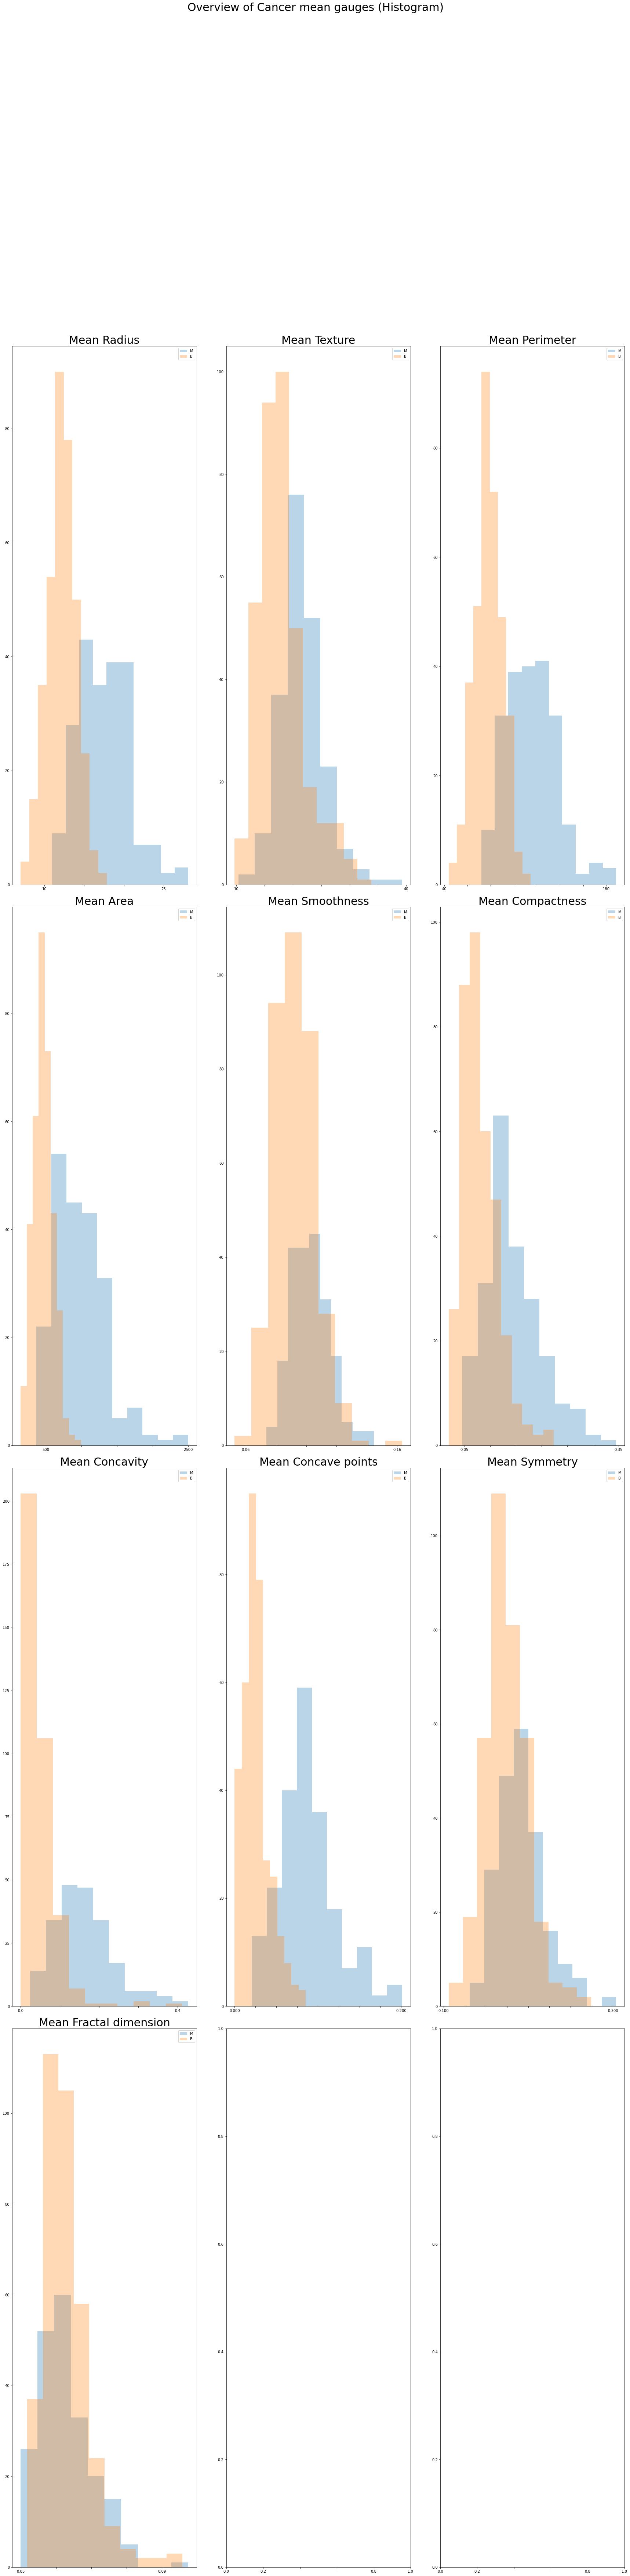

In [13]:
# %matplotlib qt
myHistogram = MyHistogram()
legends = ["M", "B"]
columnList = gaugeColumnList["Mean"]
fig, axes = plt.subplots(math.ceil(len(columnList) / 3), 3, figsize=(25, 100))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
myHistogram.histogram(dataset_training, columnList, axes, legends)
title = "Overview of Cancer mean gauges (Histogram)"
plt.suptitle(title, fontsize=30)
plt.subplots_adjust(top=0.85)
set_x_axis(axes)
plt.show()

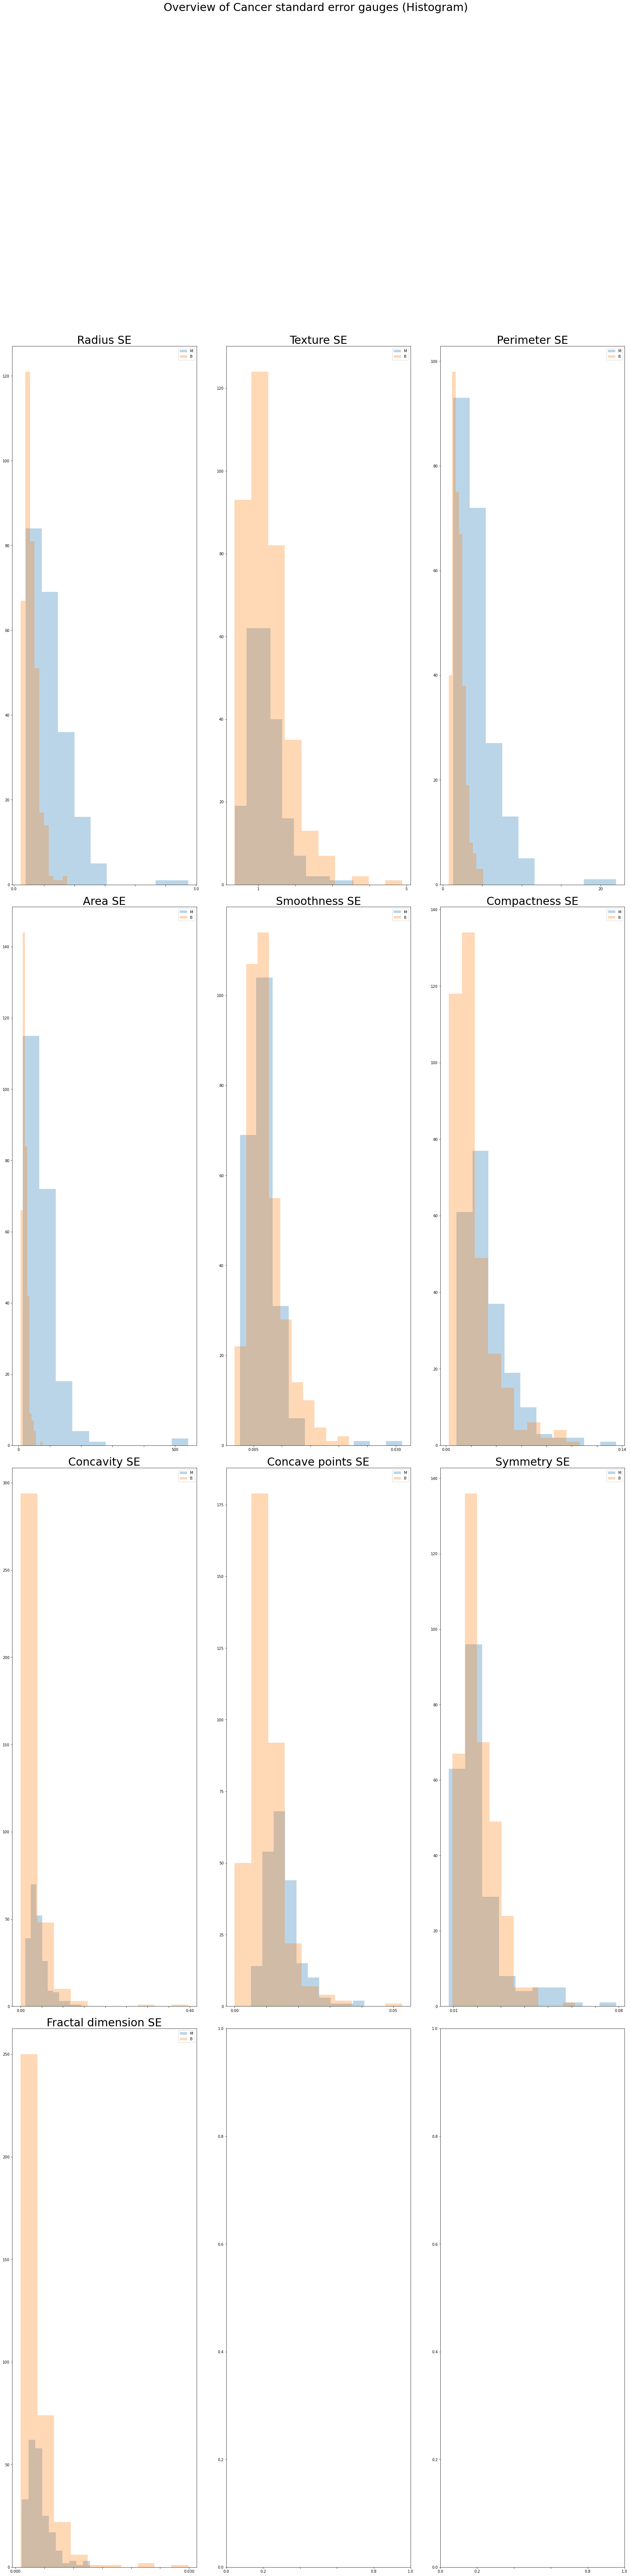

In [14]:
# %matplotlib qt
myHistogram = MyHistogram()
legends = ["M", "B"]
columnList = gaugeColumnList["SE"]
fig, axes = plt.subplots(math.ceil(len(columnList) / 3), 3, figsize=(25, 100))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
myHistogram.histogram(dataset_training, columnList, axes, legends)
title = "Overview of Cancer standard error gauges (Histogram)"
plt.suptitle(title, fontsize=30)
plt.subplots_adjust(top=0.85)
set_x_axis(axes)
plt.show()

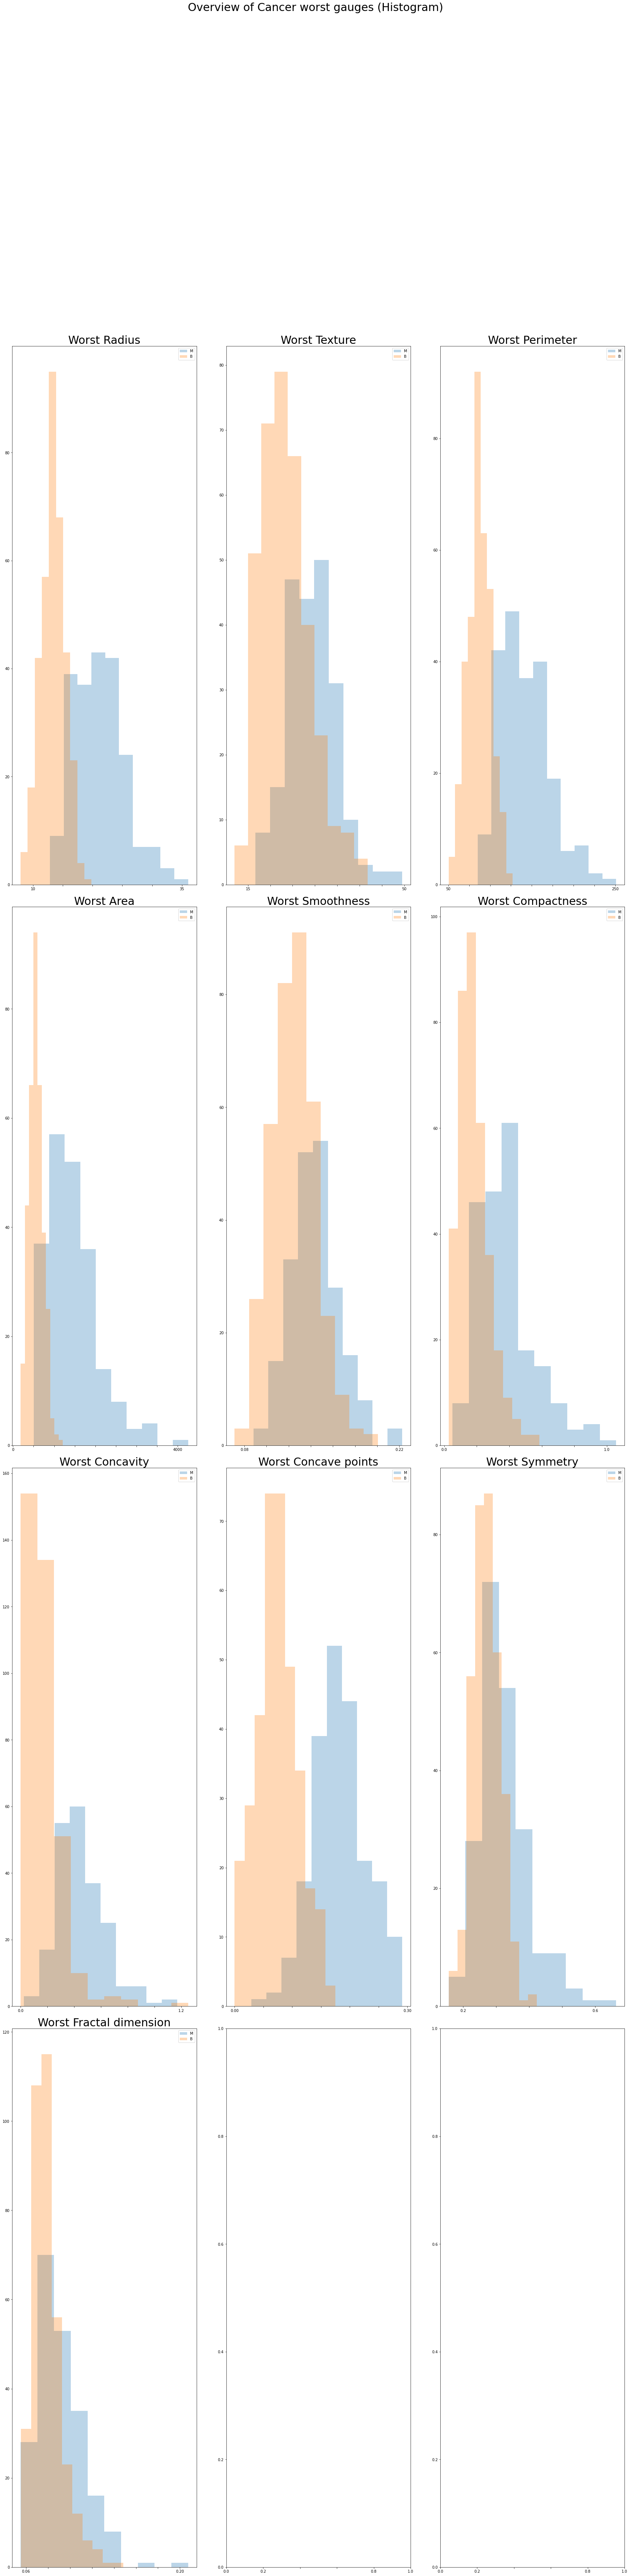

In [15]:
# %matplotlib qt
myHistogram = MyHistogram()
legends = ["M", "B"]
columnList = gaugeColumnList["Worst"]
fig, axes = plt.subplots(math.ceil(len(columnList) / 3), 3, figsize=(25, 100))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
myHistogram.histogram(dataset_training, columnList, axes, legends)
title = "Overview of Cancer worst gauges (Histogram)"
plt.suptitle(title, fontsize=30)
plt.subplots_adjust(top=0.85)
set_x_axis(axes)
plt.show()


In [16]:
def create_scatter_matrix(dataFrame, dataFrameColor, title):
    axes = pd.plotting.scatter_matrix(dataFrame, alpha=0.2,
                                      diagonal="kde", figsize=(25, 100), color=dataFrameColor)
    axes = axes.flatten()
    for i in range(0, len(axes)):
        axes[i].xaxis.label.set_rotation(30)
        axes[i].yaxis.label.set_rotation(0)
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
    handles = [plt.plot([],[],color=colorList[i], ls="", marker=".", \
                        markersize=12)[0] for i in range(2)]
    labels = ["Malignant", "Benign"]
    plt.legend(handles, labels, loc=(1.02,0))
    plt.suptitle(title, fontsize=45)
    plt.tight_layout()
    plt.gcf().subplots_adjust(wspace=0, hspace=0)
    plt.show()

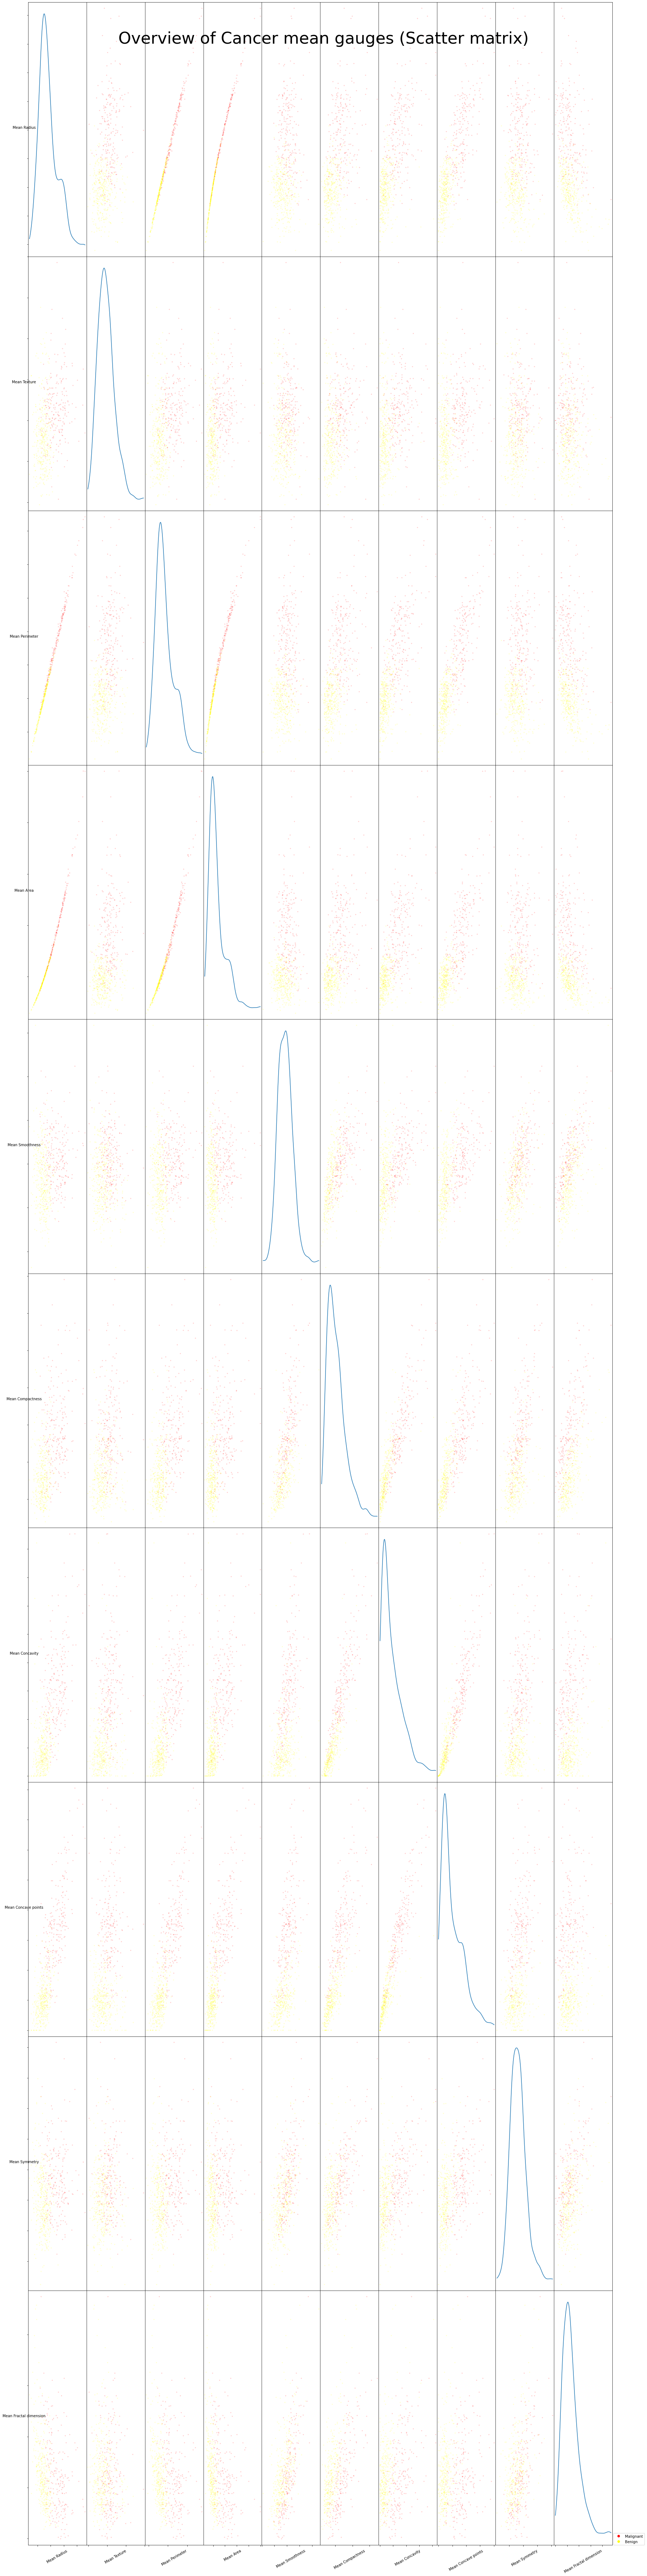

In [17]:
# %matplotlib qt
columnList = gaugeColumnList["Mean"]
title = "Overview of Cancer mean gauges (Scatter matrix)"
dataFrame = dataset_training[columnList]
dataFrameColor = dataset_training["Color"]
create_scatter_matrix(dataFrame, dataFrameColor, title)


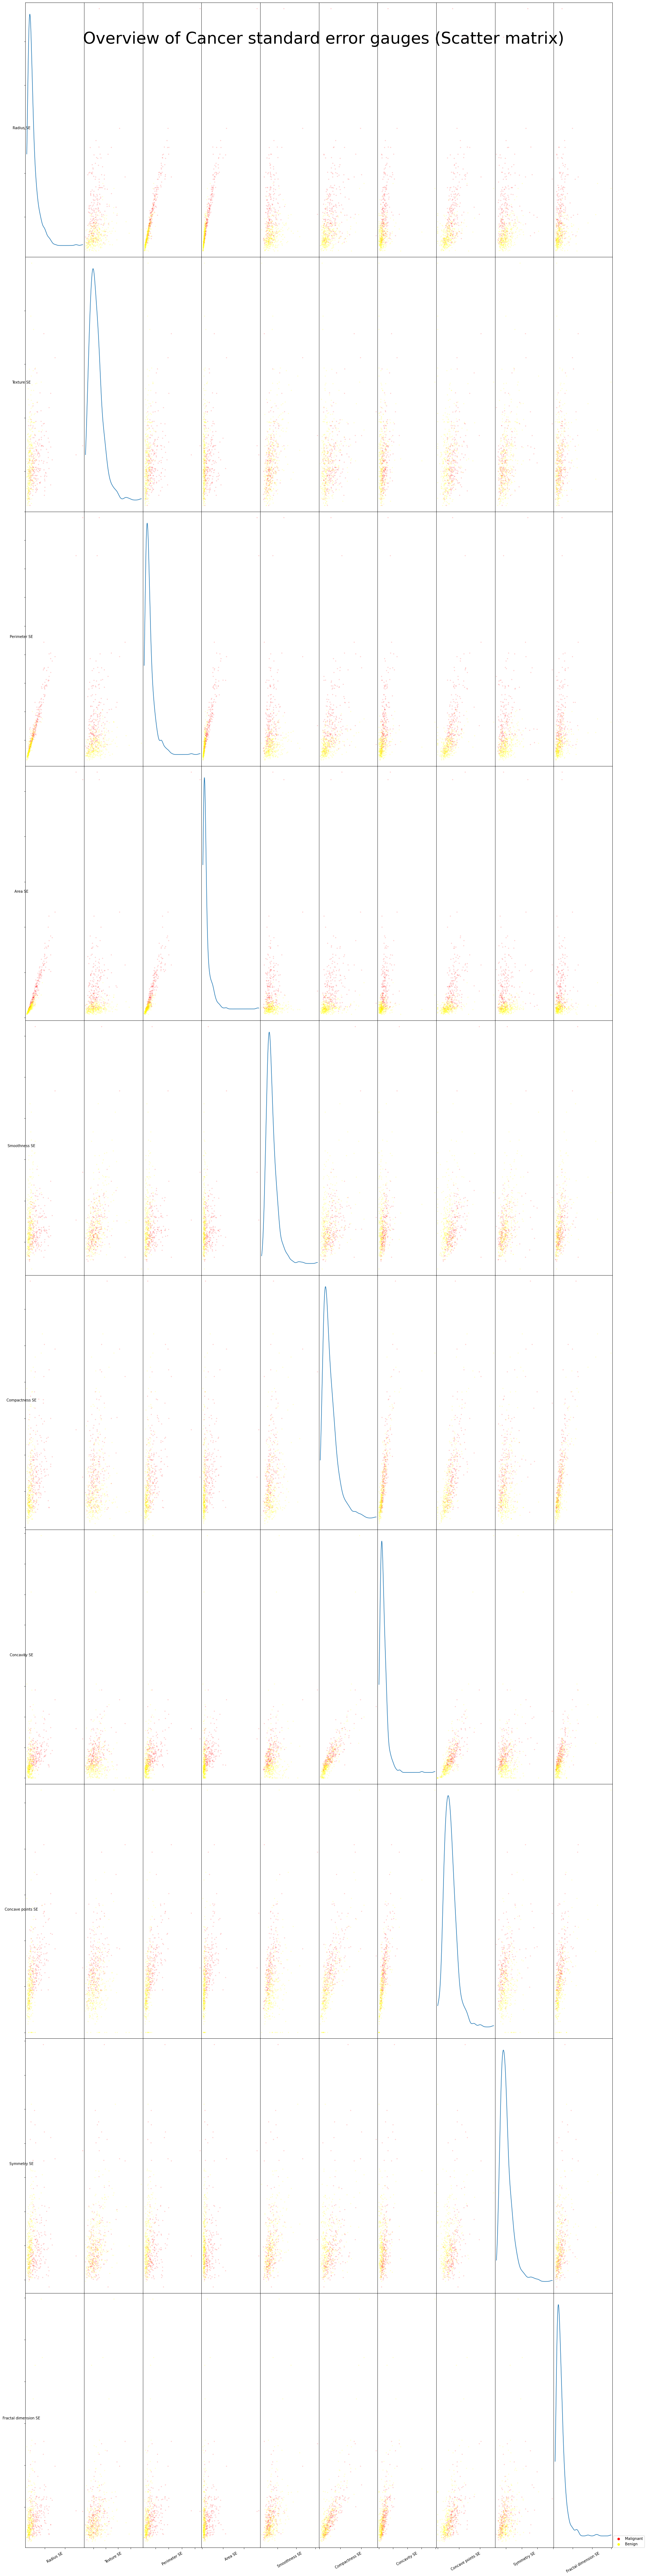

In [18]:
# %matplotlib qt
columnList = gaugeColumnList["SE"]
title = "Overview of Cancer standard error gauges (Scatter matrix)"
dataFrame = dataset_training[columnList]
dataFrameColor = dataset_training["Color"]
create_scatter_matrix(dataFrame, dataFrameColor, title)


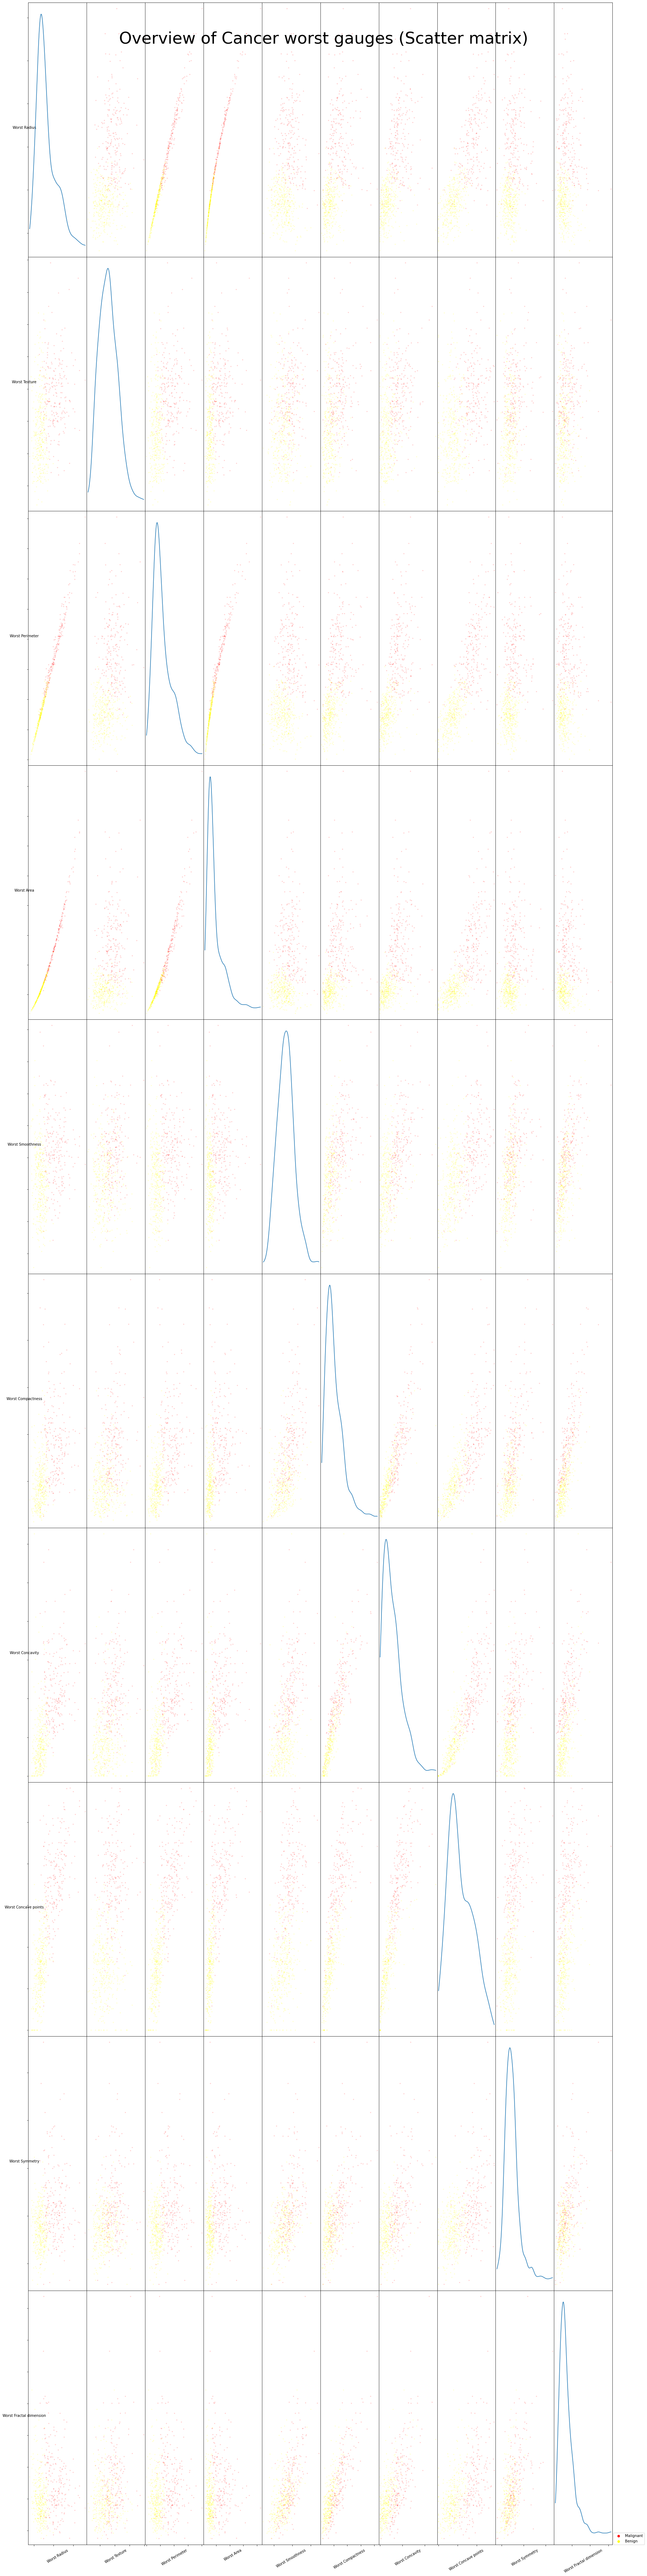

In [19]:
# %matplotlib qt
columnList = gaugeColumnList["Worst"]
title = "Overview of Cancer worst gauges (Scatter matrix)"
dataFrame = dataset_training[columnList]
dataFrameColor = dataset_training["Color"]
create_scatter_matrix(dataFrame, dataFrameColor, title)


In [20]:
def create_box_plot(dataFrame, rows, columns, title):
    fig, ax = plt.subplots(2,5)
    dataFrame.plot(kind='box', subplots=True, ax=ax, sharex=False, sharey=False)
    fig.suptitle(title, fontsize=40)
    plt.show()
    return


In [38]:
# %matplotlib qt
columnList = gaugeColumnList["Mean"]
columns = math.ceil(np.sqrt(len(columnList)))
rows = math.ceil(len(columnList) / columns)
title = "Overview of Cancer mean gauges (Boxplot)"
dataFrame = dataset_training[columnList]
create_box_plot(dataFrame, rows, columns, title)


In [39]:
%matplotlib qt
columnList = gaugeColumnList["SE"]
columns = math.ceil(np.sqrt(len(columnList)))
rows = math.ceil(len(columnList) / columns)
title = "Overview of Cancer standard error gauges (Boxplot)"
dataFrame = dataset_training[columnList]
create_box_plot(dataFrame, rows, columns, title)


In [40]:
%matplotlib qt
columnList = gaugeColumnList["Worst"]
columns = math.ceil(np.sqrt(len(columnList)))
rows = math.ceil(len(columnList) / columns)
title = "Overview of Cancer worst gauges (Boxplot)"
dataFrame = dataset_training[columnList]
create_box_plot(dataFrame, rows, columns, title)


In [11]:
def create_correlation_plot(dataFrame, columnList, title):
    correlations = dataFrame[columnList].corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(columnList), 1)
    fig.suptitle(title, fontsize=30)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(columnList, rotation=20)
    ax.set_yticklabels(columnList)
    plt.show()


In [12]:
%matplotlib qt
columnList = gaugeColumnList["Mean"]
title = "Overview of Cancer mean gauges (Correlations)"
dataFrame = dataset_training[columnList]
create_correlation_plot(dataFrame, columnList, title)


In [13]:
%matplotlib qt
columnList = gaugeColumnList["SE"]
title = "Overview of Cancer standard error gauges (Correlations)"
dataFrame = dataset_training[columnList]
create_correlation_plot(dataFrame, columnList, title)


In [14]:
%matplotlib qt
columnList = gaugeColumnList["Worst"]
title = "Overview of Cancer worst gauges (Correlations)"
dataFrame = dataset_training[columnList]
create_correlation_plot(dataFrame, columnList, title)
